# Task  1 - Prediction Using Supervised  ML

# Submitted by - Shubham Agarwal

## Simple Linear Regression

### Step 1 Importing Required Libraries

In [3]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [4]:
df=pd.read_csv("http://bit.ly/w-data")

In [5]:
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info() #Information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.shape

(25, 2)

In [8]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
df.count()

Hours     25
Scores    25
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Unique Values

In [42]:
df.nunique()

Hours     23
Scores    23
dtype: int64

### Missing  Values

In [13]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No missing values in  dataset

### Data Visualisation

<AxesSubplot:title={'center':'Hours Vs Scores'}, xlabel='Hours', ylabel='Scores'>

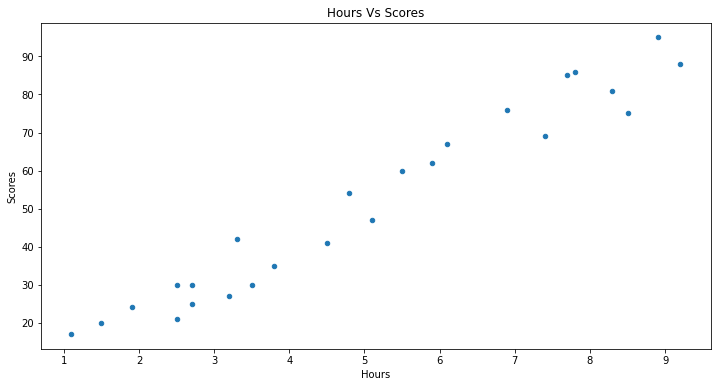

In [18]:
df.plot(kind='scatter',x='Hours',y='Scores',title='Hours Vs Scores',figsize=(12,6)) #Plotting with help of pandas built-in data visualisation

### As we can see,there is a linear relationship between hours studied and score percentage

In [19]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

### Splitting data into train and test data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

### Training our model to perform Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

Training Complete

### Calculating Constants of Regression Line

In [26]:
slope=lr.coef_

In [27]:
intercept=lr.intercept_

In [30]:
print(slope)
print(intercept)

[9.61405732]
3.370382388693173


### Regression Line

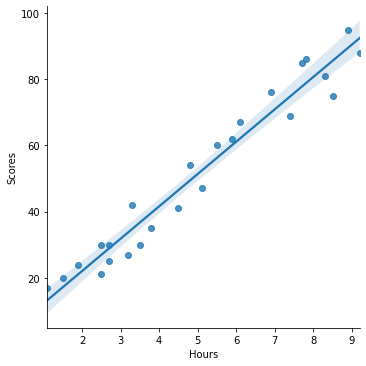

In [31]:
sns.lmplot(data=df,x='Hours',y='Scores') #Data as points and regression line

## Predicting Scores

In [32]:
pred=lr.predict(X_test)

pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

### Comparing Actual Vs Predicted 

In [34]:
de=pd.DataFrame({'Actual':y_test,'Predicted':pred})

de

,Actual,Predicted
0,60,56.247698
1,85,77.398624
2,76,69.707378
3,81,83.167058
4,30,29.328337
5,47,52.402075
6,69,74.514407
7,27,34.135366


### Evaluating the Model

In [35]:
from sklearn import metrics

In [38]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))


Mean Absolute Error: 4.817108597564743
Mean Squared Error: 28.388699379556982
Root Mean Squared Error: 5.328104670476828


### Predicting Score at 9.25 Hours

In [41]:
p=lr.predict([[9.25]])
print("No. of Hours: 9.25")
print("Predicted Score =",format(p[0]))

No. of Hours: 9.25
Predicted Score = 92.3004125718524
